In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as plticker
import seaborn

In [121]:
SalesLog = pd.read_csv('sales.csv')
SalesLog.head(7)

,install,Time_stamp,Game_Name,Status,Payment,Customer_ID
0,2022-01-08,2022-02-05,MineGround,play,4900,facilis140
1,2022-01-05,2022-02-17,MineGround,play,29900,debitis994
2,2022-01-29,2022-02-06,MineGround,play,4900,possimus246
3,2022-01-09,2022-02-05,MineGround,play,900,occaecati138
4,2022-01-08,2022-02-01,MineGround,play,900,corrupti325
5,2022-01-15,2022-02-18,MineGround,play,4900,voluptate353
6,2022-01-12,2022-02-10,MineGround,play,4900,labore435


In [122]:
SalesLog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99845 entries, 0 to 99844
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   install      99845 non-null  object
 1   Time_stamp   99845 non-null  object
 2   Game_Name    99845 non-null  object
 3   Status       99845 non-null  object
 4   Payment      99845 non-null  int64 
 5   Customer_ID  99845 non-null  object
dtypes: int64(1), object(5)
memory usage: 4.6+ MB


In [123]:
SalesLog['Month'] = SalesLog['Time_stamp'].str[:7]

In [124]:
temp_data = SalesLog['Payment'].groupby(SalesLog['Month']).sum()
temp_data

Month
2022-02    80841800
2022-03    63601300
Name: Payment, dtype: int64

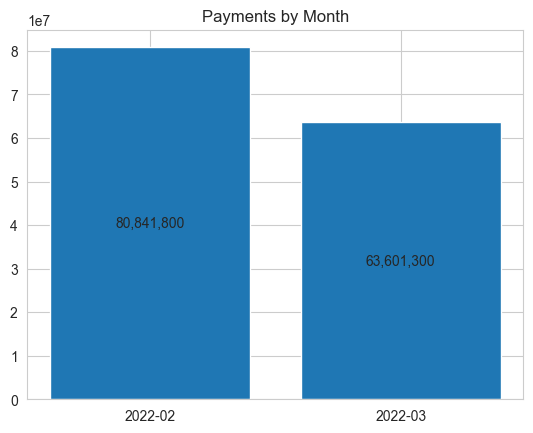

In [125]:
ax = plt.bar(temp_data.index, temp_data)
plt.bar_label(ax, labels=[f'{x:,.0f}' for x in ax.datavalues], label_type='center')
plt.title('Payments by Month')
plt.show()

In [126]:
#각 게임별로 신규 유저가 몇 명인지, 전체 유저에서 얼만큼 비중을 차지하는지 (Status가 install인 유저를 신규 유저)
#각 게임별로 무과금 유저와 과금 유저의 성별, 통신사 분포에 유의미한 차이가 있는지 (Status가 play면서 Payment가 0인 유저를 무과금 유저)
#장기 유저와 단기 유저 사이에 결제 금액에 차이가 있는지 (install과 Time_stamp의 차이가 30일 이상인 경우를 장기 유저

In [127]:
SalesLog.groupby('Game_Name')
allcustomers = SalesLog[['Game_Name','Status']]
newcustomers = allcustomers[allcustomers['Status']=='install']
newcustomers

,Game_Name,Status
84821,MineGround,install
84822,MineGround,install
84823,MineGround,install
84824,MineGround,install
84825,MineGround,install
...,...,...
99840,SoccerManager,install
99841,SoccerManager,install
99842,SoccerManager,install
99843,SoccerManager,install


In [128]:
Sales02 = SalesLog[(SalesLog['Month'] == '2022-02')& (SalesLog['Payment'] != 0)]
Sales02.reset_index(drop=True)

,install,Time_stamp,Game_Name,Status,Payment,Customer_ID,Month
0,2022-01-08,2022-02-05,MineGround,play,4900,facilis140,2022-02
1,2022-01-05,2022-02-17,MineGround,play,29900,debitis994,2022-02
2,2022-01-29,2022-02-06,MineGround,play,4900,possimus246,2022-02
3,2022-01-09,2022-02-05,MineGround,play,900,occaecati138,2022-02
4,2022-01-08,2022-02-01,MineGround,play,900,corrupti325,2022-02
...,...,...,...,...,...,...,...
8537,2022-02-12,2022-02-14,SoccerManager,play,4900,quam946,2022-02
8538,2022-02-10,2022-02-14,SoccerManager,play,4900,commodi507,2022-02
8539,2022-02-16,2022-02-21,SoccerManager,play,900,rerum275,2022-02
8540,2022-02-16,2022-02-20,SoccerManager,play,9900,quo151,2022-02


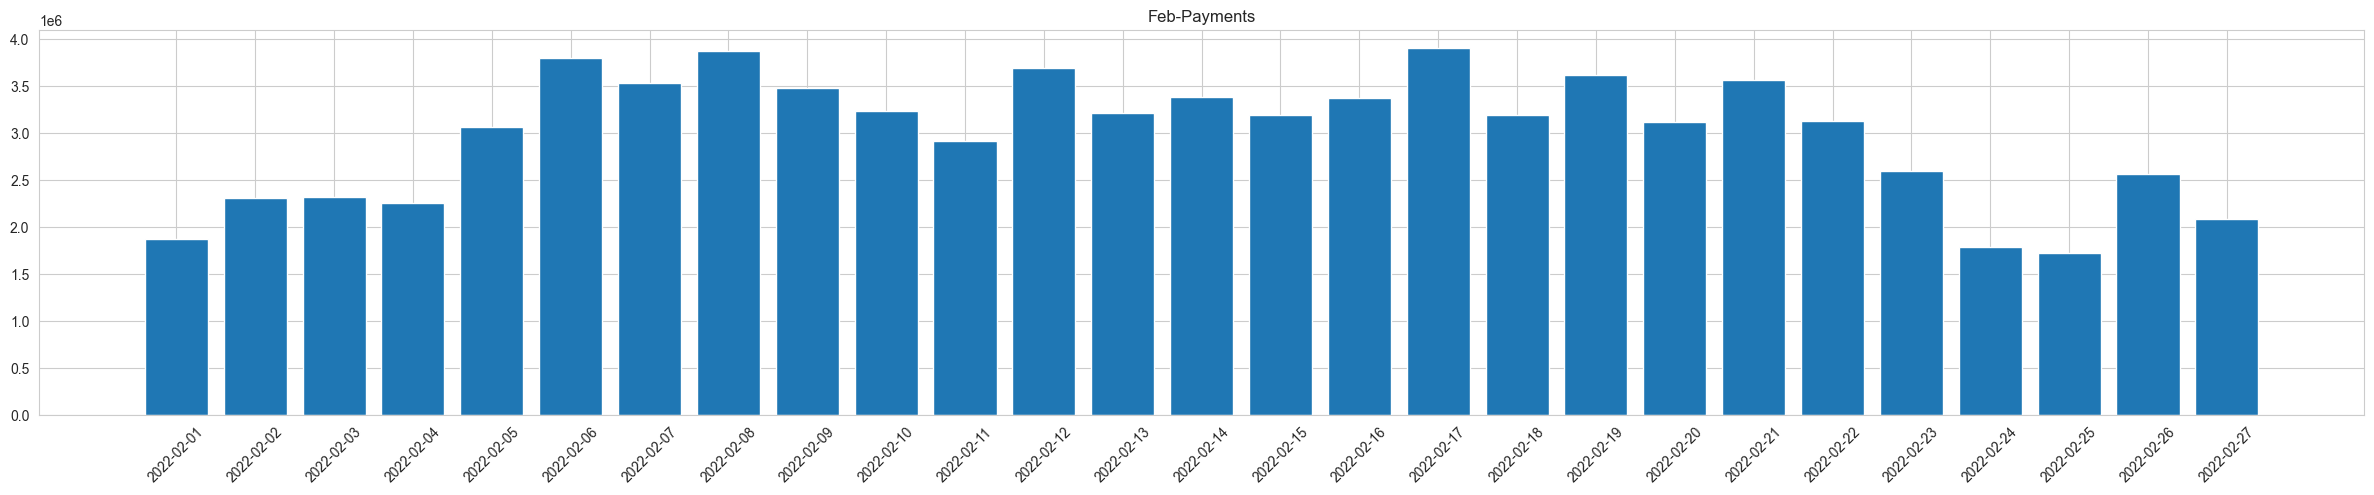

In [129]:
temp_data = Sales02['Payment'].groupby(Sales02['Time_stamp']).sum()
plt.figure(figsize=(30,5))
plt.bar(temp_data.index, temp_data)
plt.title('Feb-Payments')
plt.xticks(rotation=45)
plt.show()

In [130]:
newcustomers = newcustomers.value_counts(newcustomers['Game_Name']) 
allcustomers = allcustomers.value_counts(allcustomers['Game_Name']) 
oldcustomers = allcustomers - newcustomers

In [131]:
stackedbar = pd.DataFrame({'New players': newcustomers, 'Old players': oldcustomers})
stackedbar = stackedbar.assign(Percentage1=lambda x: (100*(x['New players'] / (x['New players'] + x['Old players']))))
stackedbar = stackedbar.assign(Percentage2=lambda x: (100*(x['Old players'] / (x['New players'] + x['Old players']))))

stackedbar

,New players,Old players,Percentage1,Percentage2
Game_Name,,,,
MineGround,9722,50191,16.226862,83.773138
SoccerManager,5302,34630,13.277572,86.722428


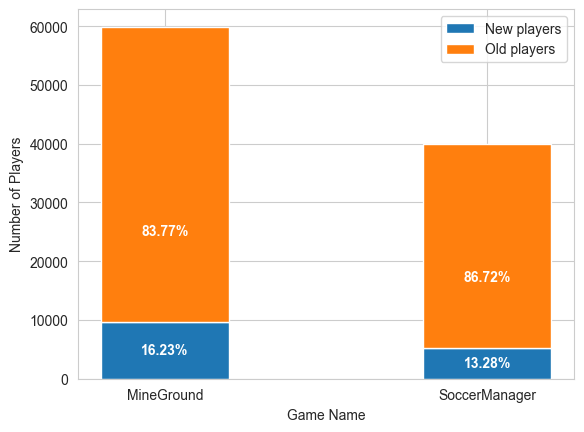

In [132]:
fig, ax = plt.subplots()
bar_width = 0.4
bar_positions = range(len(stackedbar.index))
ax.bar(bar_positions, stackedbar['New players'], label='New players', width=bar_width)
ax.bar(bar_positions, stackedbar['Old players'], bottom=stackedbar['New players'], label='Old players', width=bar_width)
ax.set_xticks(bar_positions)
ax.set_xticklabels(stackedbar.index)
for i, value in enumerate(stackedbar['Percentage1']):
    ax.text(bar_positions[i], stackedbar['New players'][i]/2,
            f'{value:.2f}%', ha='center', va='center', color='white', fontweight='bold')
for i, value in enumerate(stackedbar['Percentage2']):
    ax.text(bar_positions[i], stackedbar['Old players'][i]/2,
            f'{value:.2f}%', ha='center', va='center', color='white', fontweight='bold')
    
ax.set_xlabel('Game Name')
ax.set_ylabel('Number of Players')
ax.legend()
plt.show()

In [133]:
CustomerLog = pd.read_csv('gamecustomer.csv')
CustomerLog.head(7)

,Customer_ID,Name,Nickname,Password,Email,Birth,Gender,C.P.,MobileCompany,OS
0,facilis140,이영순,quos,********,coejongsu@yu.kr,1989-03-11,female,01x9-4x625-x5x3x,LGU,iOS
1,debitis994,김중수,molestiae,********,jiweon02@ju.org,1995-11-19,male,01x9-3x228-x3x9x,KT,iOS
2,possimus246,양은경,rem,********,coesubin@jusighoesa.com,2005-12-24,female,01x9-7x873-x2x2x,LGU,Android
3,occaecati138,백도윤,libero,********,yeongceol80@gangryu.kr,2003-02-09,female,01x9-3x519-x7x1x,SKT,iOS
4,corrupti325,김영수,temporibus,********,jiweon96@yu.net,2004-05-04,male,01x9-0x079-x9x2x,LGU,Android
5,voluptate353,이진호,eum,********,di@yu.com,1999-02-01,male,01x9-8x635-x2x4x,SKT,iOS
6,labore435,류영일,libero,********,bagjeongsig@ju.com,1983-03-27,female,01x9-0x993-x1x6x,SKT,Android


In [134]:
pie_data = CustomerLog.groupby(CustomerLog['Gender']).count().Name
pie_data

Gender
female    40149
male      59696
Name: Name, dtype: int64

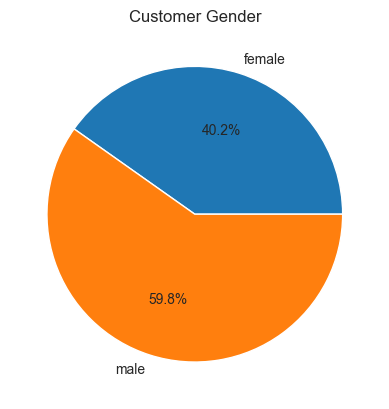

In [135]:
plt.pie(pie_data, labels=pie_data.index, autopct = '%1.1f%%')
plt.title('Customer Gender')
plt.show()

In [136]:
TotalData = pd.merge(SalesLog,CustomerLog)
TotalData.head(7)

,install,Time_stamp,Game_Name,Status,Payment,Customer_ID,Month,Name,Nickname,Password,Email,Birth,Gender,C.P.,MobileCompany,OS
0,2022-01-08,2022-02-05,MineGround,play,4900,facilis140,2022-02,이영순,quos,********,coejongsu@yu.kr,1989-03-11,female,01x9-4x625-x5x3x,LGU,iOS
1,2022-01-05,2022-02-17,MineGround,play,29900,debitis994,2022-02,김중수,molestiae,********,jiweon02@ju.org,1995-11-19,male,01x9-3x228-x3x9x,KT,iOS
2,2022-01-29,2022-02-06,MineGround,play,4900,possimus246,2022-02,양은경,rem,********,coesubin@jusighoesa.com,2005-12-24,female,01x9-7x873-x2x2x,LGU,Android
3,2022-01-09,2022-02-05,MineGround,play,900,occaecati138,2022-02,백도윤,libero,********,yeongceol80@gangryu.kr,2003-02-09,female,01x9-3x519-x7x1x,SKT,iOS
4,2022-01-08,2022-02-01,MineGround,play,900,corrupti325,2022-02,김영수,temporibus,********,jiweon96@yu.net,2004-05-04,male,01x9-0x079-x9x2x,LGU,Android
5,2022-01-15,2022-02-18,MineGround,play,4900,voluptate353,2022-02,이진호,eum,********,di@yu.com,1999-02-01,male,01x9-8x635-x2x4x,SKT,iOS
6,2022-01-12,2022-02-10,MineGround,play,4900,labore435,2022-02,류영일,libero,********,bagjeongsig@ju.com,1983-03-27,female,01x9-0x993-x1x6x,SKT,Android


In [137]:
TotalData['Payment'].describe()

count    99845.000000
mean      1446.673344
std       5766.999740
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      49900.000000
Name: Payment, dtype: float64

In [138]:
TotalData['Payment'].idxmin()

15309

In [139]:
TotalData['Payment'].idxmax()

20

In [140]:
TotalData.loc[20]

install                     2022-01-11
Time_stamp                  2022-02-15
Game_Name                   MineGround
Status                            play
Payment                          49900
Customer_ID                  magnam459
Month                          2022-02
Name                               김성현
Nickname                      officiis
Password                      ********
Email            hyeonjun96@ogweon.org
Birth                       1998-12-20
Gender                          female
C.P.                  01x9-6x498-x1x3x
MobileCompany                      SKT
OS                             Android
Name: 20, dtype: object

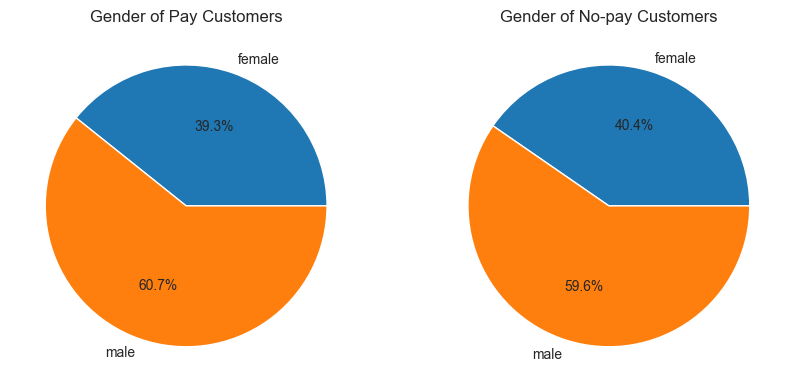

In [141]:
# PAY
PaymentCustomer = TotalData[(TotalData["Payment"] != 0)]

pie_data_pay = PaymentCustomer.groupby(['Gender']).count().Name
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot PAY chart
ax1.pie(pie_data_pay, labels=pie_data_pay.index, autopct='%1.1f%%')
ax1.set_title('Gender of Pay Customers')

# NOPAY
NoPaymentCustomer = TotalData[(TotalData["Payment"] == 0)]

pie_data_nopay = NoPaymentCustomer.groupby(['Gender']).count().Name

# Plot NOPAY chart
ax2.pie(pie_data_nopay, labels=pie_data_nopay.index, autopct='%1.1f%%')
ax2.set_title('Gender of No-pay Customers')

plt.show()



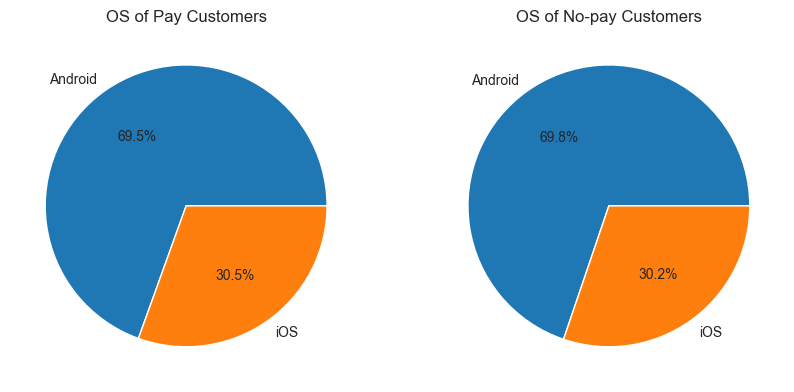

In [142]:
pie_data_pay = PaymentCustomer.groupby(['OS']).count().Name
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot PAY chart
ax1.pie(pie_data_pay, labels=pie_data_pay.index, autopct='%1.1f%%')
ax1.set_title('OS of Pay Customers')

# NOPAY
pie_data_nopay = NoPaymentCustomer.groupby(['OS']).count().Name

# Plot NOPAY chart
ax2.pie(pie_data_nopay, labels=pie_data_nopay.index, autopct='%1.1f%%')
ax2.set_title('OS of No-pay Customers')

plt.show()

In [143]:
TotalData['BirthYear'] = TotalData['Birth'].str[:4].astype(int)
TotalData.value_counts(TotalData['BirthYear']).sort_index()

BirthYear
1981    3107
1982    3845
1983    3982
1984    4137
1985    3953
1986    3931
1987    4027
1988    4067
1989    4004
1990    3965
1991    4026
1992    4056
1993    3914
1994    4019
1995    3925
1996    4073
1997    4069
1998    3934
1999    3939
2000    3935
2001    4004
2002    4015
2003    4075
2004    3950
2005    3962
2006     931
Name: count, dtype: int64

In [144]:
from dateutil import relativedelta
from dateutil.parser import parse

TotalData['install'] = pd.to_datetime(TotalData['install'], format="%Y-%m-%d")
TotalData['Time_stamp'] = pd.to_datetime(TotalData['Time_stamp'], format="%Y-%m-%d")

trial_users = TotalData.loc[(TotalData['Status']=='play') & (TotalData['Payment']==0)]
trial_users['trial_days'] = trial_users['Time_stamp'] - trial_users['install']

paid_users = TotalData.loc[(TotalData['Status']=='play') & (TotalData['Payment']!=0)]
paid_users['paying_period'] = paid_users['Time_stamp'] - paid_users['install']
paid_users.head(5)

/var/folders/lv/6sn5r88509q7_c7kwjyblyn80000gn/T/ipykernel_1959/2187344212.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial_users['trial_days'] = trial_users['Time_stamp'] - trial_users['install']
/var/folders/lv/6sn5r88509q7_c7kwjyblyn80000gn/T/ipykernel_1959/2187344212.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paid_users['paying_period'] = paid_users['Time_stamp'] - paid_users['install']


,install,Time_stamp,Game_Name,Status,Payment,Customer_ID,Month,Name,Nickname,Password,Email,Birth,Gender,C.P.,MobileCompany,OS,BirthYear,paying_period
0,2022-01-08,2022-02-05,MineGround,play,4900,facilis140,2022-02,이영순,quos,********,coejongsu@yu.kr,1989-03-11,female,01x9-4x625-x5x3x,LGU,iOS,1989,28 days
1,2022-01-05,2022-02-17,MineGround,play,29900,debitis994,2022-02,김중수,molestiae,********,jiweon02@ju.org,1995-11-19,male,01x9-3x228-x3x9x,KT,iOS,1995,43 days
2,2022-01-29,2022-02-06,MineGround,play,4900,possimus246,2022-02,양은경,rem,********,coesubin@jusighoesa.com,2005-12-24,female,01x9-7x873-x2x2x,LGU,Android,2005,8 days
3,2022-01-09,2022-02-05,MineGround,play,900,occaecati138,2022-02,백도윤,libero,********,yeongceol80@gangryu.kr,2003-02-09,female,01x9-3x519-x7x1x,SKT,iOS,2003,27 days
4,2022-01-08,2022-02-01,MineGround,play,900,corrupti325,2022-02,김영수,temporibus,********,jiweon96@yu.net,2004-05-04,male,01x9-0x079-x9x2x,LGU,Android,2004,24 days


In [145]:
trial_users['trial_days'].idxmin()


15326

In [146]:
trial_users.loc[20036]

install              2022-01-21 00:00:00
Time_stamp           2022-02-15 00:00:00
Game_Name                     MineGround
Status                              play
Payment                                0
Customer_ID                   dolorum818
Month                            2022-02
Name                                 이상훈
Nickname                            illo
Password                        ********
Email            minseo26@yuhanhoesa.com
Birth                         1981-08-28
Gender                              male
C.P.                    01x9-4x280-x2x0x
MobileCompany                        SKT
OS                               Android
BirthYear                           1981
trial_days              25 days 00:00:00
Name: 20036, dtype: object

In [147]:
trial_users['trial_days'].describe()

count                         69512
mean     22 days 17:54:38.075727931
std      16 days 10:37:37.232843695
min                 1 days 00:00:00
25%                 4 days 00:00:00
50%                25 days 00:00:00
75%                36 days 00:00:00
max                57 days 00:00:00
Name: trial_days, dtype: object

In [148]:
paid_users['Payment'].describe()

count    15309.000000
mean      9435.175387
std      11897.228643
min        900.000000
25%        900.000000
50%       4900.000000
75%       9900.000000
max      49900.000000
Name: Payment, dtype: float64

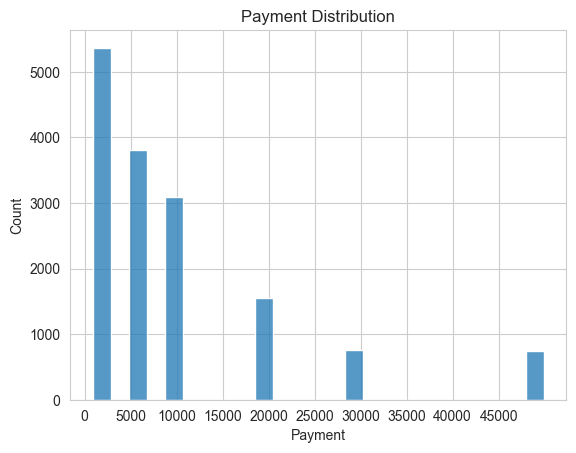

In [149]:
import seaborn as sns
sns.histplot(data=paid_users, x='Payment', bins=25) 
plt.title('Payment Distribution')
plt.xticks(range(0, max(paid_users['Payment']) + 1, 5000))
# plt.locator_params(axis='x', nbins=10)
plt.show()


In [150]:
paid_users['paying_day'] = paid_users['paying_period'].astype(str).str[:2].astype(int)


/var/folders/lv/6sn5r88509q7_c7kwjyblyn80000gn/T/ipykernel_1959/838359857.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paid_users['paying_day'] = paid_users['paying_period'].astype(str).str[:2].astype(int)


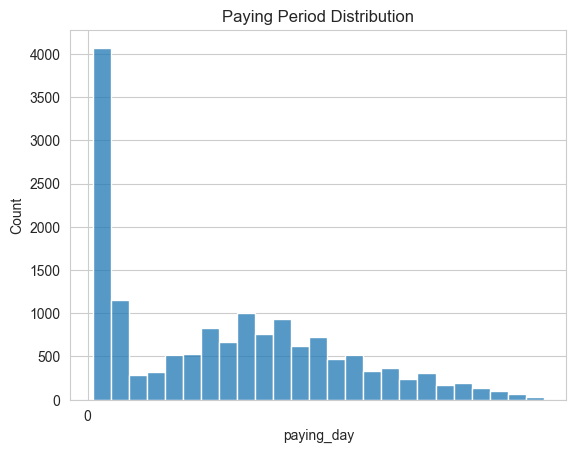

In [151]:
import seaborn as sns
sns.histplot(data=paid_users, x='paying_day', bins=25) 
plt.title('Paying Period Distribution')
plt.xticks(range(0, max(paid_users['paying_day']) + 1, 90))
# plt.locator_params(axis='x', nbins=10)
plt.show()

In [152]:
paid_users['Payment'].unique()


array([ 4900, 29900,   900, 19900,  9900, 49900])

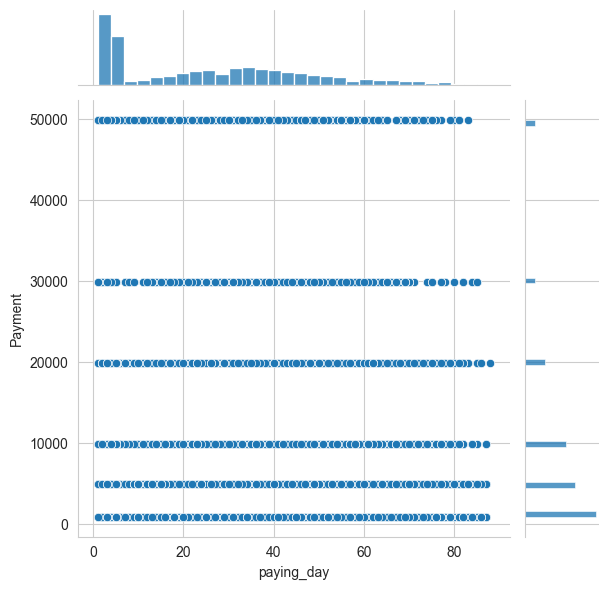

In [153]:
sns.set_style("whitegrid")
sns.jointplot(data=paid_users, x='paying_day', y='Payment')

plt.show()

In [154]:
paid_users['pass_type'] = paid_users['Payment'].copy()
replacement_dict = {49900: 'Type A', 29900: 'Type B', 19900: 'Type C', 9900: 'Type D', 4900: 'Type E', 900: 'Type F'}
paid_users['pass_type'] = paid_users['pass_type'].replace(replacement_dict)

paid_users.head(2)

/var/folders/lv/6sn5r88509q7_c7kwjyblyn80000gn/T/ipykernel_1959/3504264952.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paid_users['pass_type'] = paid_users['Payment'].copy()
/var/folders/lv/6sn5r88509q7_c7kwjyblyn80000gn/T/ipykernel_1959/3504264952.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paid_users['pass_type'] = paid_users['pass_type'].replace(replacement_dict)


,install,Time_stamp,Game_Name,Status,Payment,Customer_ID,Month,Name,Nickname,Password,Email,Birth,Gender,C.P.,MobileCompany,OS,BirthYear,paying_period,paying_day,pass_type
0,2022-01-08,2022-02-05,MineGround,play,4900,facilis140,2022-02,이영순,quos,********,coejongsu@yu.kr,1989-03-11,female,01x9-4x625-x5x3x,LGU,iOS,1989,28 days,28,Type E
1,2022-01-05,2022-02-17,MineGround,play,29900,debitis994,2022-02,김중수,molestiae,********,jiweon02@ju.org,1995-11-19,male,01x9-3x228-x3x9x,KT,iOS,1995,43 days,43,Type B


In [155]:
replacement_dict.values()

dict_values(['Type A', 'Type B', 'Type C', 'Type D', 'Type E', 'Type F'])

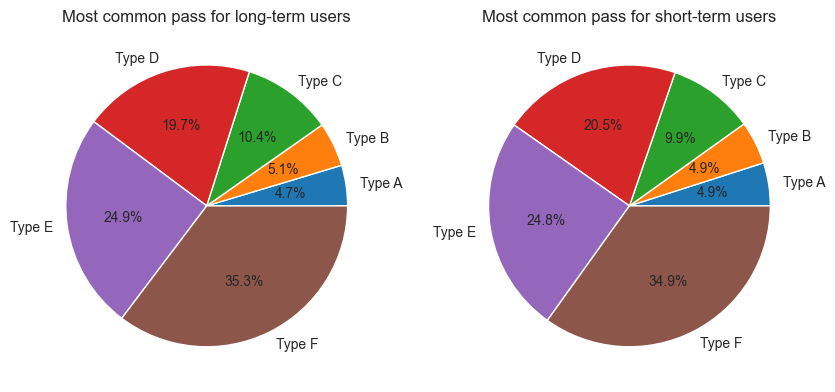

In [156]:
import matplotlib.pyplot as plt

# Assuming 'replacement_dict' and 'paid_users' are defined
long_common_pass = paid_users.loc[paid_users['paying_day'] >= 30].groupby(paid_users['pass_type']).count().Name
short_common_pass = paid_users.loc[paid_users['paying_day'] < 30].groupby(paid_users['pass_type']).count().Name

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first pie chart
axes[0].pie(long_common_pass, labels=replacement_dict.values(), autopct='%1.1f%%')
axes[0].set_title("Most common pass for long-term users")

# Plot the second pie chart
axes[1].pie(short_common_pass, labels=replacement_dict.values(), autopct='%1.1f%%')
axes[1].set_title("Most common pass for short-term users")

plt.show()


In [157]:
grouped = SalesLog['Status'].groupby([SalesLog['Month'], SalesLog['Game_Name']]).count()
grouped

Month    Game_Name    
2022-02  MineGround       27721
         SoccerManager    21659
2022-03  MineGround       32192
         SoccerManager    18273
Name: Status, dtype: int64

In [158]:
# 월별 각 게임 고객 수 시각화하기
ax = sns.barplot(data=grouped.reset_index(), x='date', y='Status', hue='Game_Name')

containers = ax.containers[-1]
containers0 = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
ax.bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')
plt.title('Customer Count by Game')
plt.show()

ValueError: Could not interpret input 'date'

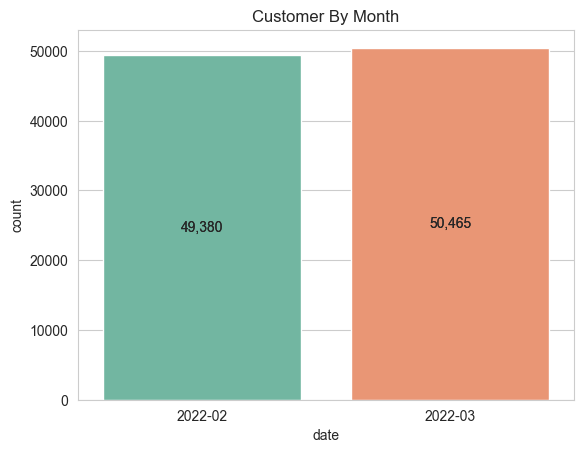

In [ ]:
ax = sns.countplot(data=SalesLog, x='Month', palette='Set2')

containers = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
containers0 = ax.containers[-1]
ax.bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')
plt.title('Customer By Month')

plt.show()

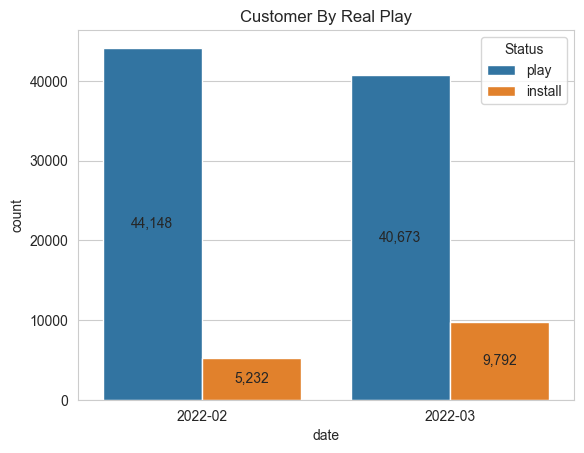

In [ ]:
#adding hue to break down each column
ax = sns.countplot(data=SalesLog, x='Month', hue='Status')

containers = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
containers0 = ax.containers[-1]
ax.bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')
plt.title('Customer By Real Play')

plt.show()

In [ ]:
temp_data = SalesLog[SalesLog['Payment'] !=0]
temp_data['Month'].value_counts()

Month
2022-02    8542
2022-03    6767
Name: count, dtype: int64

In [ ]:
temp_data.head(5)

,install,Time_stamp,Game_Name,Status,Payment,Customer_ID,Month
0,2022-01-08,2022-02-05,MineGround,play,4900,facilis140,2022-02
1,2022-01-05,2022-02-17,MineGround,play,29900,debitis994,2022-02
2,2022-01-29,2022-02-06,MineGround,play,4900,possimus246,2022-02
3,2022-01-09,2022-02-05,MineGround,play,900,occaecati138,2022-02
4,2022-01-08,2022-02-01,MineGround,play,900,corrupti325,2022-02


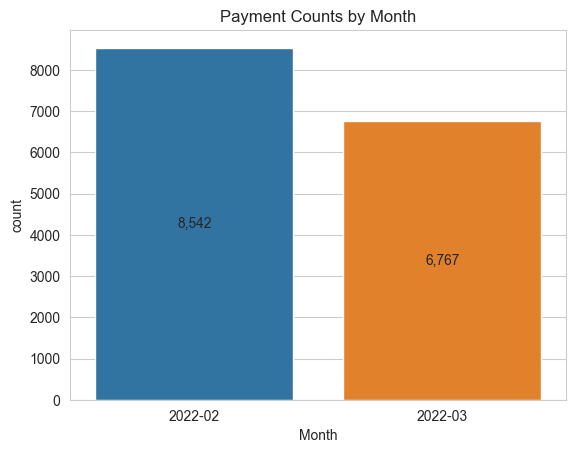

In [ ]:
# 월별 결제 횟수 시각화하기
ax = sns.countplot(data=temp_data, x='Month')
containers = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
plt.title('Payment Counts by Month')
plt.show()

In [ ]:
grouped = temp_data['Payment'].groupby([temp_data['Month'], temp_data['Game_Name']]).count()

grouped

Month    Game_Name    
2022-02  MineGround       4318
         SoccerManager    4224
2022-03  MineGround       3631
         SoccerManager    3136
Name: Payment, dtype: int64

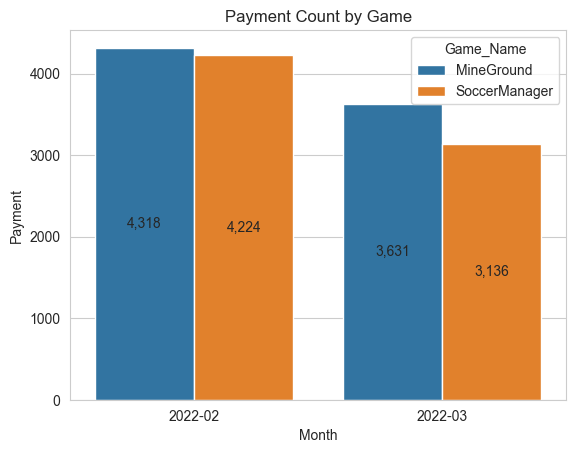

In [ ]:
ax = sns.barplot(data=grouped.reset_index(), x='Month', y='Payment', hue='Game_Name')

containers = ax.containers[-1]
containers0 = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
ax.bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')
plt.title('Payment Count by Game')
plt.show()

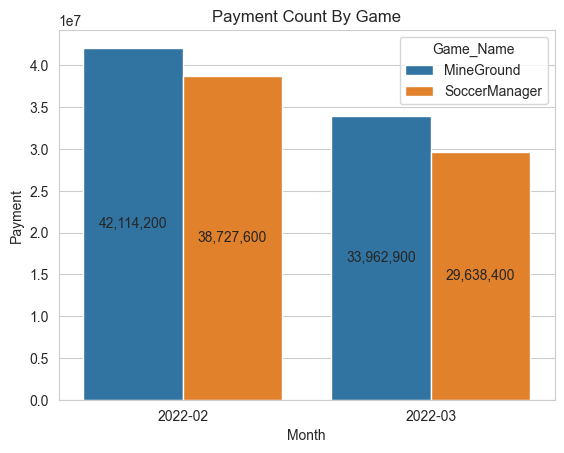

In [ ]:
grouped = temp_data['Payment'].groupby([temp_data['Month'], temp_data['Game_Name']]).sum()
ax = sns.barplot(data=grouped.reset_index(), x='Month', y='Payment', hue='Game_Name')

containers = ax.containers[-1]
containers0 = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
ax.bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')
plt.title('Payment Count By Game')
plt.show()

In [ ]:
player_data = SalesLog[SalesLog['Status'] == 'play']

player_data['install_month'] = player_data['install'].str[:7]
player_data['play_month'] = player_data['Time_stamp'].str[:7]

#인스톨한 시기와 플레이한 시기가 같으면 신규 고객(New Player) 으로 정의하고,
#인스톨한 시기와 플레이한 시기가 다르면 기존 고객(Existing) 으로 정의합니다.

player_data['player_type'] = np.where(player_data['install_month']==player_data['play_month'], 'New Player', 'Existing')

/var/folders/lv/6sn5r88509q7_c7kwjyblyn80000gn/T/ipykernel_2419/2684957081.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_data['install_month'] = player_data['install'].str[:7]
/var/folders/lv/6sn5r88509q7_c7kwjyblyn80000gn/T/ipykernel_2419/2684957081.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_data['play_month'] = player_data['Time_stamp'].str[:7]
/var/folders/lv/6sn5r88509q7_c7kwjyblyn80000gn/T/ipykernel_2419/2684957081.py:9: SettingWithCopyWarning: 
A value is trying to be set 

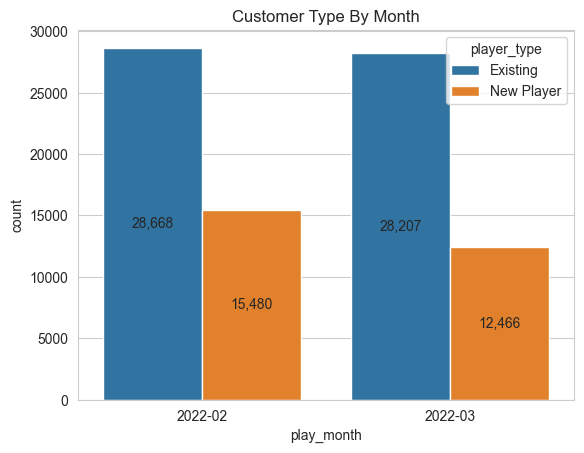

In [ ]:
# 월별 신규 고객과 기존 고객 현황 세어보기
grouped = player_data['Status'].groupby([player_data['play_month'], player_data['player_type']]).count()

ax = sns.countplot(data=player_data, x='play_month', hue="player_type")

containers = ax.containers[-1]
containers0 = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
ax.bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')
plt.title('Customer Type By Month')
plt.show()

In [ ]:
player_data.head(5)

,install,Time_stamp,Game_Name,Status,Payment,Customer_ID,Month,install_month,play_month,player_type
0,2022-01-08,2022-02-05,MineGround,play,4900,facilis140,2022-02,2022-01,2022-02,Existing
1,2022-01-05,2022-02-17,MineGround,play,29900,debitis994,2022-02,2022-01,2022-02,Existing
2,2022-01-29,2022-02-06,MineGround,play,4900,possimus246,2022-02,2022-01,2022-02,Existing
3,2022-01-09,2022-02-05,MineGround,play,900,occaecati138,2022-02,2022-01,2022-02,Existing
4,2022-01-08,2022-02-01,MineGround,play,900,corrupti325,2022-02,2022-01,2022-02,Existing


In [ ]:
grouped = player_data['Payment'].groupby([player_data['play_month'], player_data['player_type']]).sum()

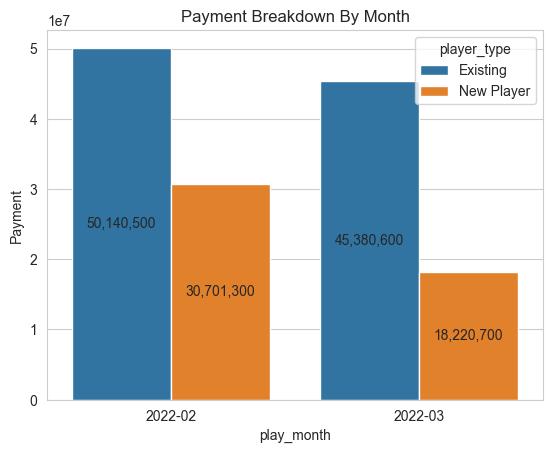

In [ ]:
# 각 게임별 결제 금액 월별 시각화하기
ax = sns.barplot(data=grouped.reset_index(), x='play_month', y='Payment', hue='player_type')

containers = ax.containers[-1]
containers0 = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
ax.bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')
plt.title('Payment Breakdown By Month')
plt.show()

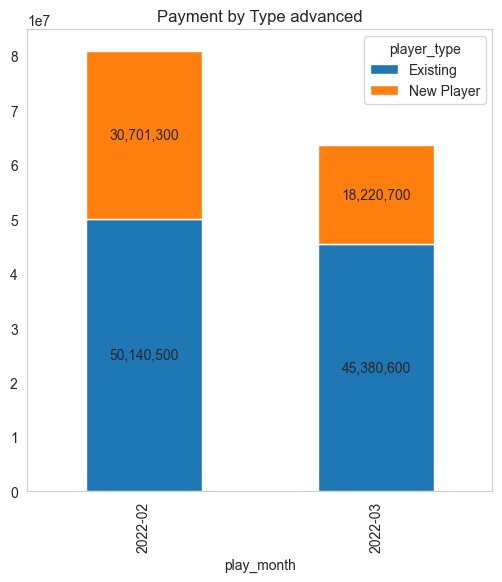

In [ ]:
#이때 사용되는 grouped 변수는 멀티 인덱스로서 unstack()함수를 이용해 일반 인덱스로 변경해야 합니다. 그 다음 plot()함수에서 stacked=True 인자를 설정해야 누적막대 그래프가 그려집니다.
ax = grouped.unstack().plot(kind='bar', stacked=True, grid=False, figsize=[6,6])


containers = ax.containers[-1]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
containers0 = ax.containers[-2]
ax.bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')

plt.title('Payment by Type advanced')
plt.show()

In [ ]:
player_data.head(5)

,install,Time_stamp,Game_Name,Status,Payment,Customer_ID,Month,install_month,play_month,player_type
0,2022-01-08,2022-02-05,MineGround,play,4900,facilis140,2022-02,2022-01,2022-02,Existing
1,2022-01-05,2022-02-17,MineGround,play,29900,debitis994,2022-02,2022-01,2022-02,Existing
2,2022-01-29,2022-02-06,MineGround,play,4900,possimus246,2022-02,2022-01,2022-02,Existing
3,2022-01-09,2022-02-05,MineGround,play,900,occaecati138,2022-02,2022-01,2022-02,Existing
4,2022-01-08,2022-02-01,MineGround,play,900,corrupti325,2022-02,2022-01,2022-02,Existing


In [ ]:
#histogram for new player's payment 
payment_data = player_data.set_index('player_type', drop=True)
payment_data

,install,Time_stamp,Game_Name,Status,Payment,Customer_ID,Month,install_month,play_month
player_type,,,,,,,,,
Existing,2022-01-08,2022-02-05,MineGround,play,4900,facilis140,2022-02,2022-01,2022-02
Existing,2022-01-05,2022-02-17,MineGround,play,29900,debitis994,2022-02,2022-01,2022-02
Existing,2022-01-29,2022-02-06,MineGround,play,4900,possimus246,2022-02,2022-01,2022-02
Existing,2022-01-09,2022-02-05,MineGround,play,900,occaecati138,2022-02,2022-01,2022-02
Existing,2022-01-08,2022-02-01,MineGround,play,900,corrupti325,2022-02,2022-01,2022-02
...,...,...,...,...,...,...,...,...,...
New Player,2022-03-06,2022-03-11,SoccerManager,play,0,sed821,2022-03,2022-03,2022-03
New Player,2022-03-20,2022-03-23,SoccerManager,play,0,minima581,2022-03,2022-03,2022-03
New Player,2022-03-25,2022-03-27,SoccerManager,play,0,harum162,2022-03,2022-03,2022-03


In [ ]:
payment_data.drop('Existing', inplace=True)


In [ ]:
payment_data.head(5)


,install,Time_stamp,Game_Name,Status,Payment,Customer_ID,Month,install_month,play_month
player_type,,,,,,,,,
New Player,2022-02-06,2022-02-11,MineGround,play,9900,dolorum016,2022-02,2022-02,2022-02
New Player,2022-02-16,2022-02-17,MineGround,play,49900,qui798,2022-02,2022-02,2022-02
New Player,2022-02-07,2022-02-08,MineGround,play,900,nesciunt993,2022-02,2022-02,2022-02
New Player,2022-02-03,2022-02-08,MineGround,play,900,ratione752,2022-02,2022-02,2022-02
New Player,2022-02-03,2022-02-06,MineGround,play,900,ullam478,2022-02,2022-02,2022-02


In [ ]:
payment_data.drop(0, inplace=True)
payment_data = payment_data.reset_index()

In [ ]:
payment_data.head(5)

,Payment,install,Time_stamp,Game_Name,Status,Customer_ID,Month,install_month,play_month
0,9900,2022-02-06,2022-02-11,MineGround,play,dolorum016,2022-02,2022-02,2022-02
1,49900,2022-02-16,2022-02-17,MineGround,play,qui798,2022-02,2022-02,2022-02
2,900,2022-02-07,2022-02-08,MineGround,play,nesciunt993,2022-02,2022-02,2022-02
3,900,2022-02-03,2022-02-08,MineGround,play,ratione752,2022-02,2022-02,2022-02
4,900,2022-02-03,2022-02-06,MineGround,play,ullam478,2022-02,2022-02,2022-02


In [ ]:
# 고객의 결제이력을 월별로 구분하기 #value cua 
payment_data_02 = payment_data.set_index('play_month').loc['2022-02'].Payment.values
payment_data_03 = payment_data.set_index('play_month').loc['2022-03'].Payment.values

# # 월별 데이터를 하나로 합치기
total_payment = np.array([payment_data_02, payment_data_03],dtype=object)
total_payment

array([array([ 9900, 49900,   900, ...,   900,  9900,  4900]),
       array([  900,  4900, 29900, ...,   900,  4900,  4900])],
      dtype=object)

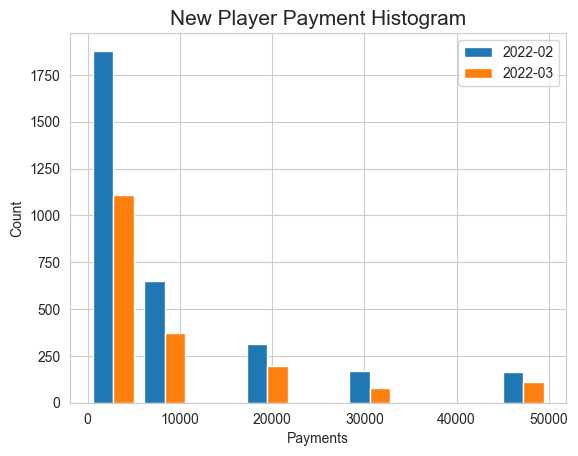

In [ ]:
# 신규 고객들의 결제이력을 히스토그램으로 그리기
bins = np.linspace(0, 50000, 10) # 0에서 시작해서 50,000까지 10의 간격으로 x축을 설정합니다.
plt.xlabel("Payments")
plt.ylabel("Count")
plt.hist(total_payment, bins, label=['2022-02', '2022-03'])
plt.legend()
plt.title("New Player Payment Histogram", fontsize=15)
plt.show()

In [ ]:
#histogram for existing players
existing_payment = player_data.set_index('player_type', drop=True)
existing_payment.drop('New Player', inplace=True)
existing_payment = existing_payment.set_index('Payment')
existing_payment.drop(0, inplace=True)

existing_payment.reset_index()

ValueError: cannot insert Payment, already exists

In [ ]:
existing_payment.columns

Index(['install', 'Time_stamp', 'Game_Name', 'Status', 'Customer_ID', 'Month',
       'install_month', 'play_month'],
      dtype='object')

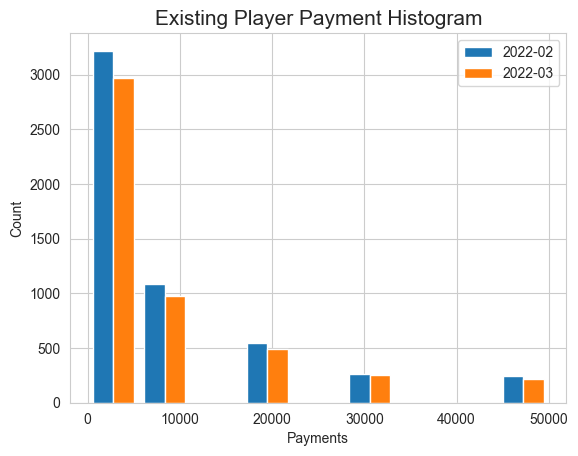

In [ ]:
array1 = existing_payment.set_index('play_month').loc['2022-02'].Payment.values
array2 = existing_payment.set_index('play_month').loc['2022-03'].Payment.values
total_existing_payment = np.array([array1, array2],dtype=object)

bins = np.linspace(0, 50000, 10) # 0에서 시작해서 50,000까지 10의 간격으로 x축을 설정합니다.
plt.xlabel("Payments")
plt.ylabel("Count")
plt.hist(total_existing_payment, bins, label=['2022-02', '2022-03'])
plt.legend()
plt.title("Existing Player Payment Histogram", fontsize=15)
plt.show()

In [ ]:
CustomerLog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99845 entries, 0 to 99844
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Customer_ID    99845 non-null  object
 1   Name           99845 non-null  object
 2   Nickname       99845 non-null  object
 3   Password       99845 non-null  object
 4   Email          99845 non-null  object
 5   Birth          99845 non-null  object
 6   Gender         99845 non-null  object
 7   C.P.           99845 non-null  object
 8   MobileCompany  99845 non-null  object
 9   OS             99845 non-null  object
dtypes: object(10)
memory usage: 7.6+ MB


In [ ]:
customer_04 = pd.read_csv('customer_04.csv')
customer_04.info()
customer_04['Month'] = customer_04['Time_stamp'].str[:7]
customer_04.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35123 entries, 0 to 35122
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   install        35123 non-null  object 
 1   Time_stamp     35123 non-null  object 
 2   Game_Name      35123 non-null  object 
 3   Status         35123 non-null  object 
 4   Payment        35123 non-null  float64
 5   Customer_ID    35123 non-null  object 
 6   Name           35123 non-null  object 
 7   Nickname       35123 non-null  object 
 8   Password       35123 non-null  object 
 9   Email          35123 non-null  object 
 10  Birth          35123 non-null  object 
 11  Gender         35123 non-null  object 
 12  C.P.           35123 non-null  object 
 13  MobileCompany  35123 non-null  object 
 14  OS             35123 non-null  object 
dtypes: float64(1), object(14)
memory usage: 4.0+ MB


,install,Time_stamp,Game_Name,Status,Payment,Customer_ID,Name,Nickname,Password,Email,Birth,Gender,C.P.,MobileCompany,OS,Month
0,2022-03-12,2022-04-03,MineGround,play,19900.0,cupiditate206,우은정,tempora,********,jangsugja@ijijang.com,1987-05-31,female,01x9-2x483-x1x2x,SKT,Android,2022-04
1,2022-01-25,2022-04-03,MineGround,play,0.0,quis973,박지아,unde,********,gimjieun@yuhanhoesa.com,2000-01-24,male,01x9-4x193-x4x2x,KT,Android,2022-04
2,2022-01-20,2022-04-02,SoccerManager,play,49900.0,ex368,김하윤,animi,********,jangyeongil@gimcoe.org,1984-05-16,male,01x9-1x376-x1x2x,MVNO,Android,2022-04


In [ ]:
total_sales_data = pd.concat ([TotalData, customer_04])
total_sales_data.iloc[99845:99847]
total_sales_data['C.P.'].describe()

count               134968
unique              126264
top       01x9-2x435-x2x5x
freq                     4
Name: C.P., dtype: object

In [ ]:
player_data = total_sales_data[total_sales_data['Status']=='play']

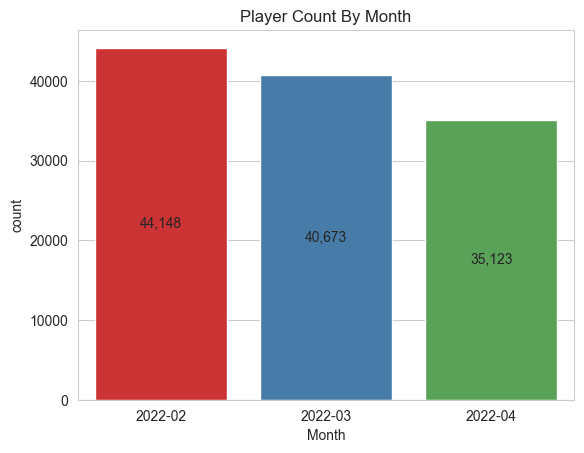

In [ ]:
ax = sns.countplot(data=player_data, x='Month', palette='Set1')

containers = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
plt.title('Player Count By Month')
plt.show()

In [ ]:
grouped = player_data[player_data['Payment'] != 0]
grouped = grouped['Payment'].groupby(grouped['Month']).sum()
grouped

Month
2022-02    80841800.0
2022-03    63601300.0
2022-04    43007400.0
Name: Payment, dtype: float64

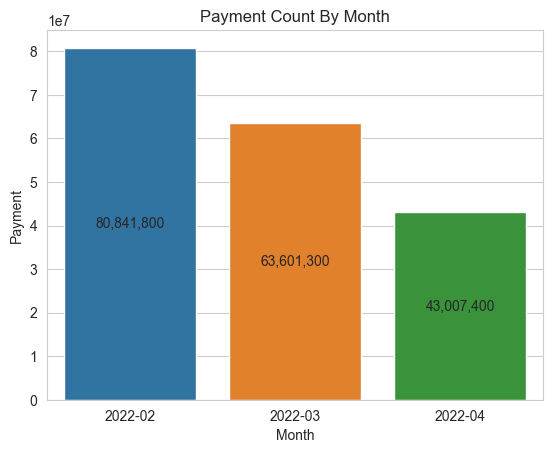

In [ ]:
ax = sns.barplot(data=grouped.reset_index(), x='Month', y='Payment')

containers = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
plt.title('Payment Count By Month')
plt.show()

In [ ]:
april_game_data = total_sales_data[total_sales_data['Month']=='2022-04']
april_game_data.head(3)

,install,Time_stamp,Game_Name,Status,Payment,Customer_ID,Month,Name,Nickname,Password,Email,Birth,Gender,C.P.,MobileCompany,OS,BirthYear
0,2022-03-12,2022-04-03,MineGround,play,19900.0,cupiditate206,2022-04,우은정,tempora,********,jangsugja@ijijang.com,1987-05-31,female,01x9-2x483-x1x2x,SKT,Android,NaN
1,2022-01-25,2022-04-03,MineGround,play,0.0,quis973,2022-04,박지아,unde,********,gimjieun@yuhanhoesa.com,2000-01-24,male,01x9-4x193-x4x2x,KT,Android,NaN
2,2022-01-20,2022-04-02,SoccerManager,play,49900.0,ex368,2022-04,김하윤,animi,********,jangyeongil@gimcoe.org,1984-05-16,male,01x9-1x376-x1x2x,MVNO,Android,NaN


In [ ]:
grouped = april_game_data['Payment'].groupby(april_game_data['Game_Name']).sum()
grouped

Game_Name
MineGround       21809900.0
SoccerManager    21197500.0
Name: Payment, dtype: float64

In [ ]:
#lineplot for time 
grouped = customer_04['Payment'].groupby([customer_04['Time_stamp'], customer_04['Game_Name']]).sum()
grouped


Time_stamp  Game_Name    
2022-04-01  MineGround       2052600.0
            SoccerManager     899700.0
2022-04-02  MineGround       1574200.0
            SoccerManager     618200.0
2022-04-03  MineGround       1603900.0
            SoccerManager     604600.0
2022-04-04  MineGround       1763300.0
            SoccerManager     913400.0
2022-04-05  MineGround       2235500.0
            SoccerManager     737900.0
2022-04-06  MineGround       1579000.0
            SoccerManager     791800.0
2022-04-07  MineGround       1695400.0
            SoccerManager     530000.0
2022-04-08  MineGround       1616500.0
            SoccerManager     539400.0
2022-04-09  MineGround       1776100.0
            SoccerManager     701600.0
2022-04-10  MineGround       1641400.0
            SoccerManager     816600.0
2022-04-11  MineGround        213400.0
            SoccerManager     508500.0
2022-04-12  MineGround        169600.0
            SoccerManager     735100.0
2022-04-13  MineGround        346300.0

Game_Name,MineGround,SoccerManager
Time_stamp,,
2022-04-01,2052600.0,899700.0
2022-04-02,1574200.0,618200.0
2022-04-03,1603900.0,604600.0
2022-04-04,1763300.0,913400.0
2022-04-05,2235500.0,737900.0
2022-04-06,1579000.0,791800.0
2022-04-07,1695400.0,530000.0
2022-04-08,1616500.0,539400.0
2022-04-09,1776100.0,701600.0


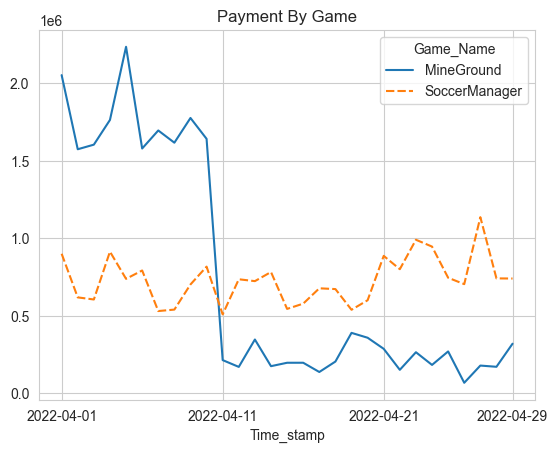

In [ ]:
ax = sns.lineplot(data=grouped.unstack())
plt.xticks([0,10,20, 28])
plt.title('Payment By Game')
plt.show()

In [ ]:
temp_var = pd.crosstab(customer_04['Time_stamp'], customer_04['Game_Name'])
temp_var.head()

Game_Name,MineGround,SoccerManager
Time_stamp,,
2022-04-01,1256,504
2022-04-02,1209,520
2022-04-03,1230,482
2022-04-04,1215,518
2022-04-05,1221,501


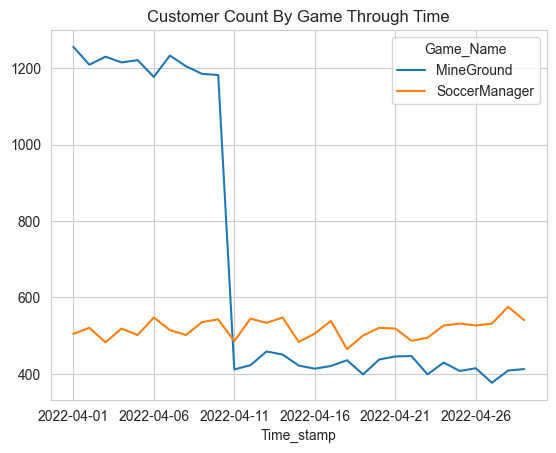

In [ ]:
temp_var.plot()
plt.title('Customer Count By Game Through Time')
plt.show()

In [ ]:
mineground_data = customer_04[customer_04['Game_Name'] == 'MineGround']
temp_var = pd.crosstab(mineground_data['Time_stamp'], mineground_data['Gender'])
temp_var.head()

Gender,female,male
Time_stamp,,
2022-04-01,506,750
2022-04-02,485,724
2022-04-03,485,745
2022-04-04,457,758
2022-04-05,468,753


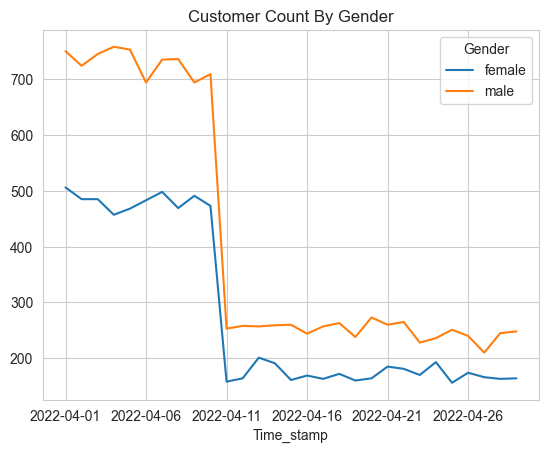

In [ ]:
temp_var.plot()
plt.title('Customer Count By Gender')
plt.show()

In [ ]:
mineground_data['Age'] = 2022 - pd.to_numeric(mineground_data['Birth'].str[:4])

temp_var = pd.crosstab(mineground_data['Time_stamp'], mineground_data['Age'])
temp_var.head()

/var/folders/lv/6sn5r88509q7_c7kwjyblyn80000gn/T/ipykernel_1261/3771380768.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mineground_data['Age'] = 2022 - pd.to_numeric(mineground_data['Birth'].str[:4])


Age,16,17,18,19,20,21,22,23,24,25,...,32,33,34,35,36,37,38,39,40,41
Time_stamp,,,,,,,,,,,,,,,,,,,,,
2022-04-01,15,52,61,37,45,38,38,49,63,53,...,44,61,43,59,55,53,55,46,52,42
2022-04-02,20,40,52,47,52,44,36,61,52,50,...,47,49,43,41,43,46,44,53,48,38
2022-04-03,11,55,48,43,54,51,41,46,46,47,...,59,26,50,50,47,64,40,52,39,43
2022-04-04,10,45,42,48,42,60,38,51,52,48,...,50,51,51,49,55,56,50,53,49,35
2022-04-05,14,49,49,42,51,42,42,43,38,50,...,60,49,53,48,56,52,49,43,48,47


In [ ]:
#divide according to age range 
bins_label = ['10','20','30','40']
bins = [16, 20, 30, 40, 50]

mineground_data['Generation'] = pd.cut(mineground_data['Age'], bins,right=False, labels=bins_label)

# 세대에 따른 일자 고객 숫자 집계하기
temp_var = pd.crosstab(mineground_data['Time_stamp'], mineground_data['Generation'])
temp_var.head()

/var/folders/lv/6sn5r88509q7_c7kwjyblyn80000gn/T/ipykernel_1261/2786237941.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mineground_data['Generation'] = pd.cut(mineground_data['Age'], bins,right=False, labels=bins_label)


Generation,10,20,30,40
Time_stamp,,,,
2022-04-01,165,476,521,94
2022-04-02,159,500,464,86
2022-04-03,157,499,492,82
2022-04-04,145,486,500,84
2022-04-05,154,467,505,95


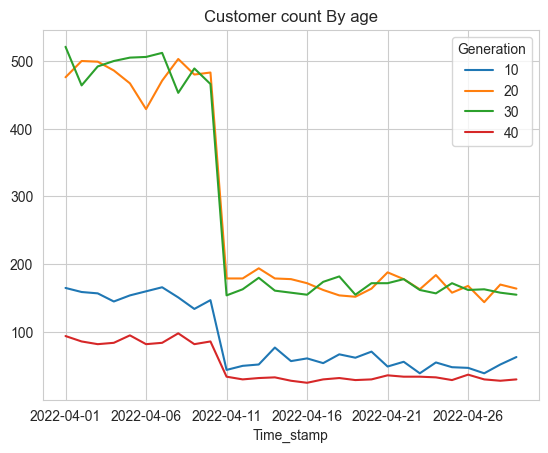

In [ ]:
# 집계 결과 시각화하기
temp_var.plot()
plt.title('Customer count By age')
plt.show()

In [ ]:
# 통신사를 기준으로 일자별 고객 숫자 집계하기
temp_var = pd.crosstab(mineground_data['Time_stamp'], mineground_data['MobileCompany'])
temp_var.head()

MobileCompany,KT,LGU,MVNO,SKT
Time_stamp,,,,
2022-04-01,329,252,140,535
2022-04-02,308,217,108,576
2022-04-03,306,207,124,593
2022-04-04,312,242,101,560
2022-04-05,325,224,130,542


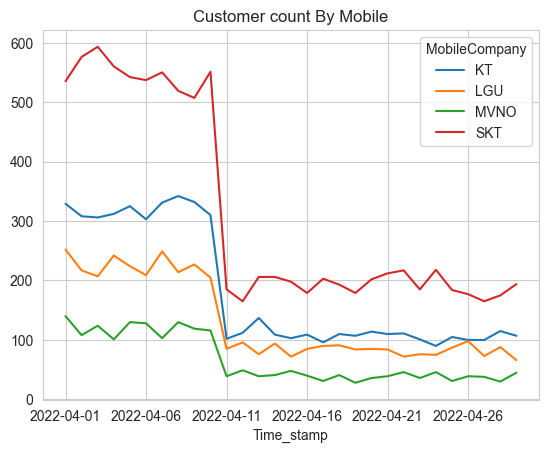

In [ ]:
# 집계 결과 시각화하기
temp_var.plot()
plt.title('Customer count By Mobile')
plt.show()

In [ ]:
temp_var = pd.crosstab(mineground_data['Time_stamp'], mineground_data['OS'])
temp_var.head()

OS,Android,iOS
Time_stamp,,
2022-04-01,744,512
2022-04-02,736,473
2022-04-03,741,489
2022-04-04,745,470
2022-04-05,729,492


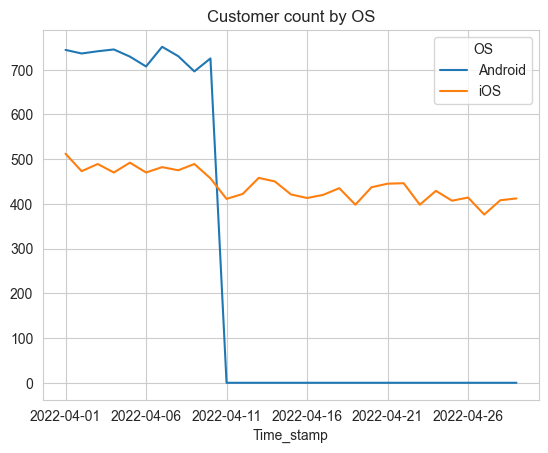

In [ ]:
temp_var.plot()
plt.title('Customer count by OS')
plt.show()

In [ ]:
soccermanager_data = customer_04[customer_04['Game_Name'] == 'SoccerManager']
temp_var = pd.crosstab(soccermanager_data['Time_stamp'], soccermanager_data['OS'])
temp_var.head()

OS,Android,iOS
Time_stamp,,
2022-04-01,310,194
2022-04-02,326,194
2022-04-03,290,192
2022-04-04,314,204
2022-04-05,283,218


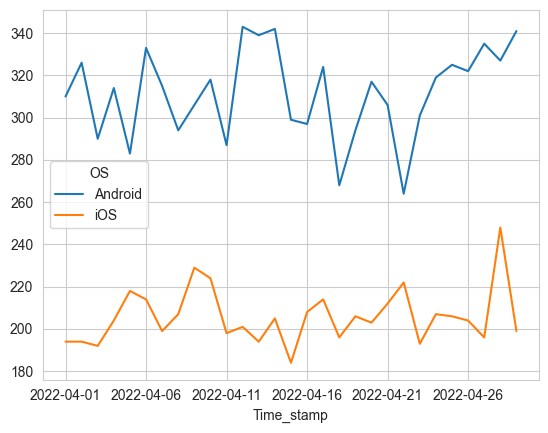

In [ ]:
temp_var.plot()
plt.show()

In [ ]:
examine = total_sales_data[(total_sales_data['Time_stamp']=='2022-04-11') & (total_sales_data['Game_Name'] == 'MineGround')]
examine['install'].describe()
strangeinstallday = examine['Time_stamp'].groupby(examine['install']).count()
strangeinstallday

install
2022-01-01    7
2022-01-02    3
2022-01-03    7
2022-01-04    3
2022-01-05    8
             ..
2022-03-20    1
2022-03-21    3
2022-03-22    4
2022-03-23    4
2022-03-24    8
Name: Time_stamp, Length: 81, dtype: int64

Text(0.5, 1.0, 'Is there any strange install date?')

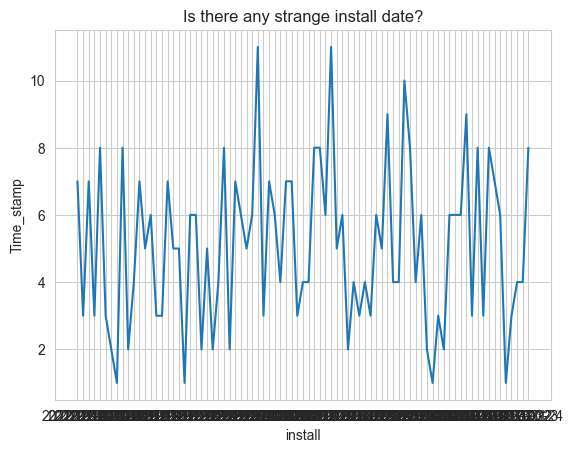

In [ ]:
ax = sns.lineplot(data=strangeinstallday)
plt.title('Is there any strange install date?')


In [ ]:
total_sales_data.info(0)

<class 'pandas.core.frame.DataFrame'>
Index: 134968 entries, 0 to 35122
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   install        134968 non-null  object  
 1   Time_stamp     134968 non-null  object  
 2   Game_Name      134968 non-null  object  
 3   Status         134968 non-null  object  
 4   Payment        134968 non-null  float64 
 5   Customer_ID    134968 non-null  object  
 6   Month          134968 non-null  object  
 7   Name           134968 non-null  object  
 8   Nickname       134968 non-null  object  
 9   Password       134968 non-null  object  
 10  Email          134968 non-null  object  
 11  Birth          134968 non-null  object  
 12  Gender         134968 non-null  object  
 13  C.P.           134968 non-null  object  
 14  MobileCompany  134968 non-null  object  
 15  OS             134968 non-null  object  
 16  BirthYear      99845 non-null   float64 
 17  Age            3

In [ ]:
total_sales_data['Customer_ID'].describe()

count         134968
unique        114203
top       dolorem127
freq               6
Name: Customer_ID, dtype: object

In [ ]:
examine2 = total_sales_data.loc[total_sales_data['Customer_ID'] == 'dolorem127']
examine2

,install,Time_stamp,Game_Name,Status,Payment,Customer_ID,Month,Name,Nickname,Password,Email,Birth,Gender,C.P.,MobileCompany,OS,BirthYear,Age,Generation
24772,2022-01-19 00:00:00,2022-02-12 00:00:00,MineGround,play,0.0,dolorem127,2022-02,주진호,praesentium,********,haeun49@yuhanhoesa.com,1983-04-21,female,01x9-2x732-x7x6x,KT,Android,1983.0,NaN,NaN
10117,2022-03-07,2022-04-19,SoccerManager,play,0.0,dolorem127,2022-04,박미숙,cum,********,eunji50@jusighoesa.kr,2002-08-29,male,01x9-5x769-x6x1x,LGU,Android,NaN,20.0,20
15911,2022-02-14,2022-04-02,MineGround,play,0.0,dolorem127,2022-04,조동현,aspernatur,********,seonghyeon51@jusighoesa.net,2004-09-30,male,01x9-7x917-x9x3x,SKT,iOS,NaN,18.0,10
18152,2022-01-13,2022-04-04,MineGround,play,0.0,dolorem127,2022-04,박현지,suscipit,********,munjimin@jusighoesa.net,2001-01-01,male,01x9-8x373-x2x5x,KT,Android,NaN,21.0,20
18618,2022-02-22,2022-04-08,MineGround,play,0.0,dolorem127,2022-04,이숙자,optio,********,hyeonjeongbag@yuhanhoesa.kr,1982-02-06,male,01x9-0x866-x8x4x,SKT,iOS,NaN,40.0,40
20500,2022-01-29,2022-04-25,SoccerManager,play,0.0,dolorem127,2022-04,지지우,rerum,********,hanujin@yu.com,2005-04-15,female,01x9-9x788-x0x5x,SKT,iOS,NaN,17.0,10


In [ ]:
examine['Nickname'].describe()

count       411
unique      159
top       error
freq          7
Name: Nickname, dtype: object

In [ ]:
total_sales_data['Nickname'].describe()

count     134968
unique       182
top       minima
freq         813
Name: Nickname, dtype: object

In [ ]:
examine['clone_Nickname'] = examine.duplicated(subset=['Nickname'])
examine.head(20)


/var/folders/lv/6sn5r88509q7_c7kwjyblyn80000gn/T/ipykernel_1261/2279098127.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  examine['clone_Nickname'] = examine.duplicated(subset=['Nickname'])


,install,Time_stamp,Game_Name,Status,Payment,Customer_ID,Month,Name,Nickname,Password,Email,Birth,Gender,C.P.,MobileCompany,OS,BirthYear,Age,Generation,clone_Nickname
27146,2022-03-02,2022-04-11,MineGround,play,900.0,quod836,2022-04,이정희,numquam,********,gweonyeweon@mungui.com,1993-02-23,female,01x9-1x854-x6x9x,LGU,iOS,NaN,29.0,20,False
27153,2022-01-10,2022-04-11,MineGround,play,0.0,dignissimos280,2022-04,이성민,doloribus,********,soneunseo@gimyuncoe.com,2005-08-01,male,01x9-6x033-x3x2x,KT,iOS,NaN,17.0,10,False
27179,2022-02-16,2022-04-11,MineGround,play,0.0,dolorem513,2022-04,김지혜,dignissimos,********,hyeonjungim@hanan.com,2003-12-16,male,01x9-2x943-x9x8x,SKT,iOS,NaN,19.0,10,False
27206,2022-03-17,2022-04-11,MineGround,play,49900.0,quod567,2022-04,이종수,ab,********,seoyeong73@yu.com,1989-12-05,female,01x9-6x221-x2x8x,LGU,iOS,NaN,33.0,30,False
27214,2022-03-10,2022-04-11,MineGround,play,0.0,cumque456,2022-04,박영미,voluptatibus,********,imyeongja@yuhanhoesa.kr,1992-10-01,male,01x9-3x921-x2x7x,MVNO,iOS,NaN,30.0,30,False
27226,2022-03-05,2022-04-11,MineGround,play,4900.0,eligendi300,2022-04,주옥순,eligendi,********,gimgwangsu@gimhwangi.kr,2002-06-05,female,01x9-7x538-x1x4x,KT,iOS,NaN,20.0,20,False
27229,2022-03-15,2022-04-11,MineGround,play,900.0,assumenda350,2022-04,류지민,officia,********,iogja@yu.com,2004-04-08,male,01x9-2x159-x1x8x,LGU,iOS,NaN,18.0,10,False
27239,2022-01-21,2022-04-11,MineGround,play,0.0,quis210,2022-04,김정희,voluptatibus,********,sunog13@gimii.com,1988-01-23,male,01x9-0x259-x2x0x,SKT,iOS,NaN,34.0,30,True
27276,2022-01-01,2022-04-11,MineGround,play,9900.0,voluptates960,2022-04,윤순옥,dolorum,********,seoyuni@yu.com,1999-11-08,female,01x9-7x188-x1x0x,LGU,iOS,NaN,23.0,20,False
27277,2022-02-14,2022-04-11,MineGround,play,0.0,laborum611,2022-04,주현주,illum,********,gimsanghun@ii.kr,1997-09-10,male,01x9-7x956-x7x3x,KT,iOS,NaN,25.0,20,False


In [ ]:
zero_payment_clone_payments = examine[(examine['Payment'] == 0) & (examine['clone_Nickname'] == True)]
zero_payment_clone_payments.shape

(250, 20)

In [ ]:
examine.shape

(411, 20)

In [ ]:
#ti le clone account on that day is more than the other days 

real_account = mineground_data['Nickname'].groupby(mineground_data['Time_stamp']).count()
real_account

Time_stamp
2022-04-01    1256
2022-04-02    1209
2022-04-03    1230
2022-04-04    1215
2022-04-05    1221
2022-04-06    1177
2022-04-07    1233
2022-04-08    1205
2022-04-09    1185
2022-04-10    1182
2022-04-11     411
2022-04-12     422
2022-04-13     458
2022-04-14     450
2022-04-15     421
2022-04-16     413
2022-04-17     420
2022-04-18     435
2022-04-19     398
2022-04-20     437
2022-04-21     445
2022-04-22     446
2022-04-23     398
2022-04-24     429
2022-04-25     407
2022-04-26     414
2022-04-27     376
2022-04-28     408
2022-04-29     412
Name: Nickname, dtype: int64

In [ ]:
for date, group in mineground_data.groupby('Time_stamp'):
    mineground_data.loc[group.index, 'clone_Nickname'] = group['Nickname'].duplicated()

ratio_per_date = mineground_data.groupby('Time_stamp')['clone_Nickname'].value_counts(normalize=True).unstack().fillna(0)
ratio_per_date['ratio'] = ratio_per_date[True] / ratio_per_date[False]

graph = ratio_per_date['ratio']
graph

Time_stamp
2022-04-01    5.901099
2022-04-02    5.642857
2022-04-03    5.833333
2022-04-04    5.675824
2022-04-05    5.708791
2022-04-06    5.502762
2022-04-07    5.774725
2022-04-08    5.620879
2022-04-09    5.510989
2022-04-10    5.494505
2022-04-11    1.584906
2022-04-12    1.588957
2022-04-13    1.775758
2022-04-14    1.710843
2022-04-15    1.582822
2022-04-16    1.518293
2022-04-17    1.545455
2022-04-18    1.573964
2022-04-19    1.472050
2022-04-20    1.664634
2022-04-21    1.730061
2022-04-22    1.654762
2022-04-23    1.456790
2022-04-24    1.584337
2022-04-25    1.592357
2022-04-26    1.620253
2022-04-27    1.350000
2022-04-28    1.487805
2022-04-29    1.496970
Name: ratio, dtype: float64

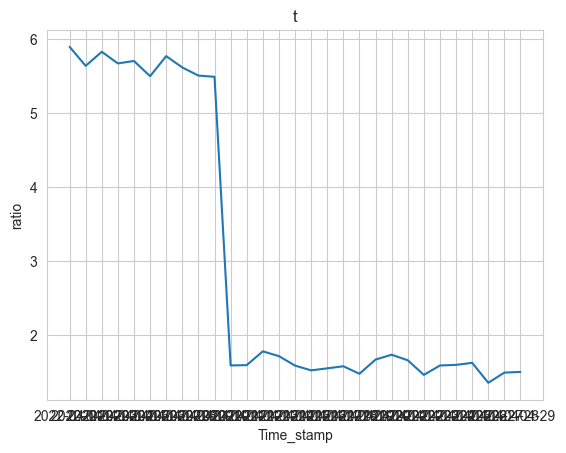

In [ ]:
ax = sns.lineplot(data=graph)
plt.title('t')
plt.show()

In [ ]:
#FINDING VIP customer 
sales_data = pd.read_csv('sales_05_8.csv')
sales_data.shape


(75087, 6)

In [ ]:
len(sales_data['ID'].unique())


5267

In [ ]:
sales_data['Now'] = '2022-06-10'
sales_data['Now'] = pd.to_datetime(sales_data['Now'])
sales_data['Time_stamp'] = pd.to_datetime(sales_data['Time_stamp'])
sales_data = sales_data[sales_data['Status'] == 'purchase']
sales_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 27682 entries, 0 to 27681
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Install     27682 non-null  object        
 1   Time_stamp  27682 non-null  datetime64[ns]
 2   Status      27682 non-null  object        
 3   ID          27682 non-null  object        
 4   Payment     27682 non-null  int64         
 5   Game_Name   27682 non-null  object        
 6   Now         27682 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 1.7+ MB


In [ ]:
sales_data['Interval'] = sales_data['Now'] - sales_data['Time_stamp']
sales_data.head(5)

/var/folders/lv/6sn5r88509q7_c7kwjyblyn80000gn/T/ipykernel_3047/1500946785.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data['Interval'] = sales_data['Now'] - sales_data['Time_stamp']


,Install,Time_stamp,Status,ID,Payment,Game_Name,Now,Interval
0,2022-01-14,2022-01-27,purchase,Heidi_635,19900,Soccer Manager,2022-06-10,134 days
1,2022-03-10,2022-03-13,purchase,Courtney_067,900,Mine Ground,2022-06-10,89 days
2,2022-02-13,2022-02-19,purchase,David_737,9900,Soccer Manager,2022-06-10,111 days
3,2022-02-07,2022-02-25,purchase,Lindsay_820,4900,Mine Ground,2022-06-10,105 days
4,2022-03-06,2022-03-10,purchase,Jon_823,49900,Soccer Manager,2022-06-10,92 days


In [ ]:
RFM_data = sales_data.groupby(['ID']).agg({'Interval':'min','ID': 'count', 'Payment': 'sum'})
RFM_data.columns = ['Recency', 'Frequency', 'Monetary']
RFM_data


NameError: name 'sales_data' is not defined

In [ ]:
RFM_data['Recency'] = RFM_data['Recency'].dt.days
RFM_data['Recency'].astype(int)
RFM_data

NameError: name 'RFM_data' is not defined

In [ ]:
RFM_data.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Recency,5267.0,66.52,35.68,7.0,36.0,61.0,94.0,158.0
Frequency,5267.0,5.26,7.00,1.0,1.0,5.0,5.0,37.0
Monetary,5267.0,50340.00,73012.36,900.0,9900.0,29900.0,55500.0,582700.0


In [ ]:
temp_var = RFM_data.sort_values(by=['Recency'], ascending = False)
temp_var.head()

,Recency,Frequency,Monetary
ID,,,
Nancy_218,158,1,900
Michael_254,155,1,900
Craig_831,155,1,19900
Matthew_192,154,1,900
Greg_925,154,1,900


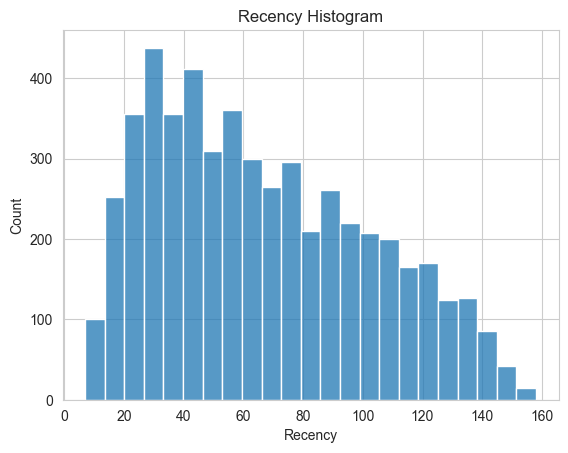

In [ ]:
ax = sns.histplot(data=temp_var['Recency'])
plt.title('Recency Histogram')
plt.show()

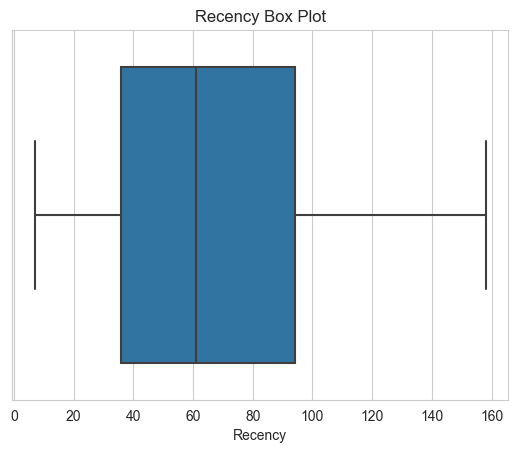

In [ ]:
ax = sns.boxplot(data=temp_var, x='Recency')
plt.title('Recency Box Plot')
plt.show()

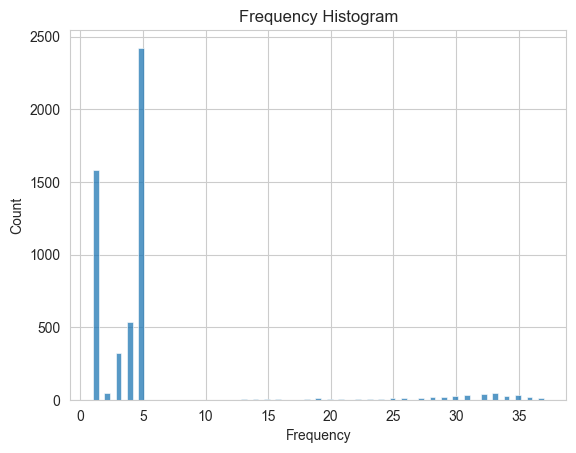

In [ ]:
ax = sns.histplot(data=temp_var['Frequency'])
plt.title('Frequency Histogram')
plt.show()

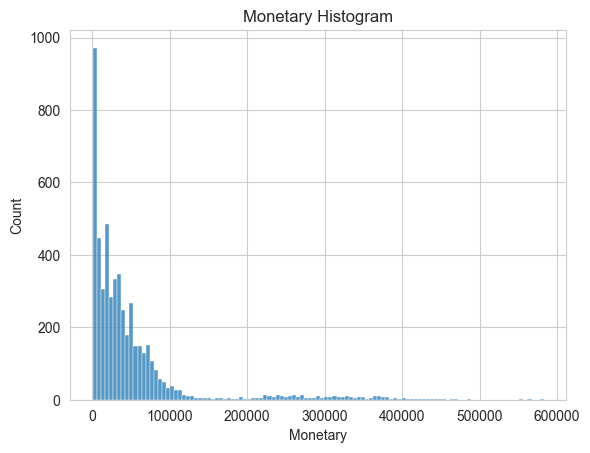

In [ ]:
ax = sns.histplot(data=temp_var['Monetary'])
plt.title('Monetary Histogram')
plt.show()

In [ ]:
#Normalization and RFM score 
RFM_data['R_score'] = np.interp(RFM_data['Recency'], (RFM_data['Recency'].min(), RFM_data['Recency'].max()), (100, 1)).round(2)
RFM_data['F_score'] = np.interp(RFM_data['Frequency'], (RFM_data['Frequency'].min(), RFM_data['Frequency'].max()), (100, 1)).round(2)
RFM_data['M_score'] = np.interp(RFM_data['Monetary'], (RFM_data['Monetary'].min(), RFM_data['Monetary'].max()), (100,1)).round(2)

TypeError: float() argument must be a string or a real number, not 'Timedelta'

In [ ]:
RFM_data["RFM_score"] = ((RFM_data['R_score'] + RFM_data['F_score'] + RFM_data['M_score'])/3).round(2)
RFM_data.head(10)

KeyError: 'R_score'

In [ ]:
#divide customer different customer classes
RFM_data['Class'] = pd.qcut(RFM_data['RFM_score'], q=[0, 0.4, 0.65, 0.85, 0.99, 1], labels=[5,4,3,2,1])
RFM_data

KeyError: 'RFM_score'

In [ ]:
RFM_data.reset_index(inplace=True)
# inplace = true: modify the current df, if false: create a new df 
RFM_data.columns

Index(['ID', 'Recency', 'Frequency', 'Monetary'], dtype='object')

In [ ]:
temp_var = RFM_data['ID'].groupby(RFM_data['Class']).count()
temp_var

KeyError: 'Class'

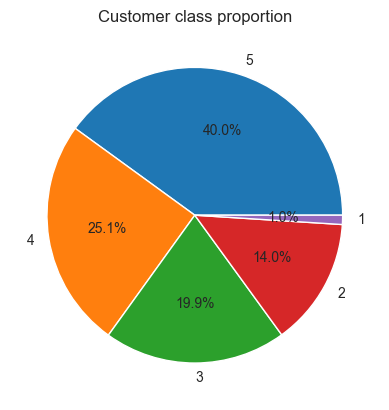

In [ ]:
plt.pie(temp_var, labels=temp_var.index, autopct= '%1.1f%%')
plt.title('Customer class proportion')
plt.show()

In [ ]:
class_analysis = RFM_data['ID'].groupby(RFM_data['Class']).agg({'Recency':'mean', 'Frequency':'mean', 'Monetary':'mean'})
class_analysis.T

KeyError: 'Class'

In [ ]:
# 집계된 temp_var의 MultiIndex를 NormalIndex로 변환합니다. 
temp_var.index = temp_var.index.tolist()
temp_var

In [ ]:
temp_var = temp_var.reset_index()
temp_var = temp_var.rename(columns = {'index':'Class'})
temp_var

In [ ]:
ax = sns.barplot(data=temp_var, x='Class', y='Recency')
containers = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
plt.title('Recency By Class')
plt.show()

In [ ]:
# 필요한 라이브러리를 호출합니다. 
from mpl_toolkits.mplot3d import Axes3D

# 시각화를 위해 필요한 Figure와 ax를 정의합니다. 
fig=plt.figure()
ax = fig.add_subplot(111, projection = '3d')

# x축, y축, z축에 각 데이터를 할당합니다. 
x = RFM_data['R_score']
y = RFM_data['F_score']
z = RFM_data['M_score']

# x축, y축, z축에 각 레이블을 부여합니다. . 
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

# 산포도 형태의 3차원 시각화를 수행합니다. 
# 이때 색깔은 x축을 기준으로 합니다. 
ax = ax.scatter(x,y,z, c=x)

plt.title('RFM Score of All Customers')
plt.show()